In [1]:
import numpy as np
# Dask imports
import dask.array as da
from dask.distributed import Client, LocalCluster

In [2]:
# NUMPY
size = 10_000
x_np = np.random.random((size, size))
y_np = np.exp(x_np).sum()
print("-- NUMPY --")
print("Result: ", y_np)

-- NUMPY --
Result:  171820954.74189886


**Set up cluster**
Only run once!

In [3]:
# DASK
cluster = LocalCluster()  # "Each node has 36 cores and 100 gb of memory"
client = Client(cluster)
print(client.dashboard_link)  # Giver et link hvor man kan se hvad der sker

http://127.0.0.1:8787/status


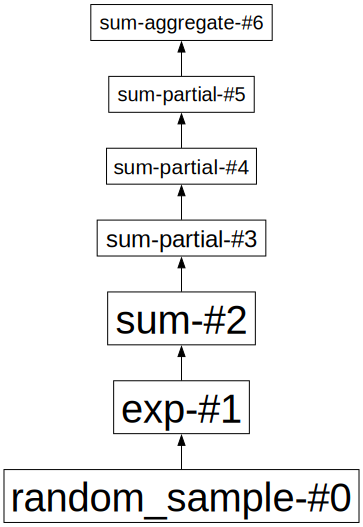

In [9]:
size = 10_000

x = da.random.random((size, size), chunks=(1000, 1000))
y = da.exp(x).sum()
#y.visualize()  # Requires graphics engine. Might need to run in jupyter
y.dask.visualize(filename='test.png')

y = y.compute()

print("-- DASK --")
print("Result: ", y)
print("Scheduler info:\t", cluster.scheduler) # Print scheduler info